In [1]:
import numpy as np
from pylab import *
import sys
sys.path.append("../python_codes/")
import comp_short
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
matscn1 = np.loadtxt('../data/MAT_scn_wt.txt')
BIN = 5000

# chr1
chr1 = matscn1[:530,:530]
scales1 = range(0,200)
n1 = chr1.shape[0]
ii=0
comp_scale1 = np.zeros((len(scales1), n1))
for nw in scales1:
    # print(nw)
    sc= nw*BIN
    c=comp_short.comp_func(chr1,nw)
    comp_scale1[ii,] = c.T
    ii=ii+1
print(comp_scale1.shape)
comp_scale1

(200, 530)


array([[0.04259112, 0.05549034, 0.05536053, ..., 0.06350917, 0.04467299,
        0.04688816],
       [0.20768206, 0.11232159, 0.12233194, ..., 0.12645507, 0.10953038,
        0.21679656],
       [0.24591267, 0.15051512, 0.15320416, ..., 0.16092849, 0.15334779,
        0.25686103],
       ...,
       [0.83304266, 0.79551079, 0.78286782, ..., 0.84096208, 0.81336758,
        0.83234778],
       [0.83445879, 0.7969179 , 0.78470317, ..., 0.84295932, 0.81475694,
        0.83354003],
       [0.83617597, 0.79830804, 0.78638475, ..., 0.84442973, 0.81602258,
        0.83462674]])

In [3]:
# chr2
chr2 = matscn1[530:613,530:613]
scales2 = range(0,40)
n2 = chr2.shape[0]
ii=0
comp_scale2 = np.zeros((len(scales2), n2))
for nw in scales2:
    #print(nw)
    sc= nw*BIN
    c=comp_short.comp_func(chr2,nw)
    comp_scale2[ii,] = c.T
    ii=ii+1
print(comp_scale2.shape)
comp_scale2

(40, 83)


array([[0.0272925 , 0.04613317, 0.0603023 , ..., 0.05288842, 0.04613908,
        0.03610246],
       [0.22904923, 0.10192253, 0.13626209, ..., 0.11529589, 0.10602504,
        0.24655747],
       [0.25454006, 0.13431547, 0.16728133, ..., 0.14921382, 0.13957619,
        0.27442483],
       ...,
       [0.47333452, 0.41052688, 0.42594189, ..., 0.4061698 , 0.39421001,
        0.50611287],
       [0.4769216 , 0.41367841, 0.42929831, ..., 0.40974597, 0.39819655,
        0.50929217],
       [0.4797744 , 0.41679912, 0.43238334, ..., 0.41271678, 0.40232408,
        0.51238003]])

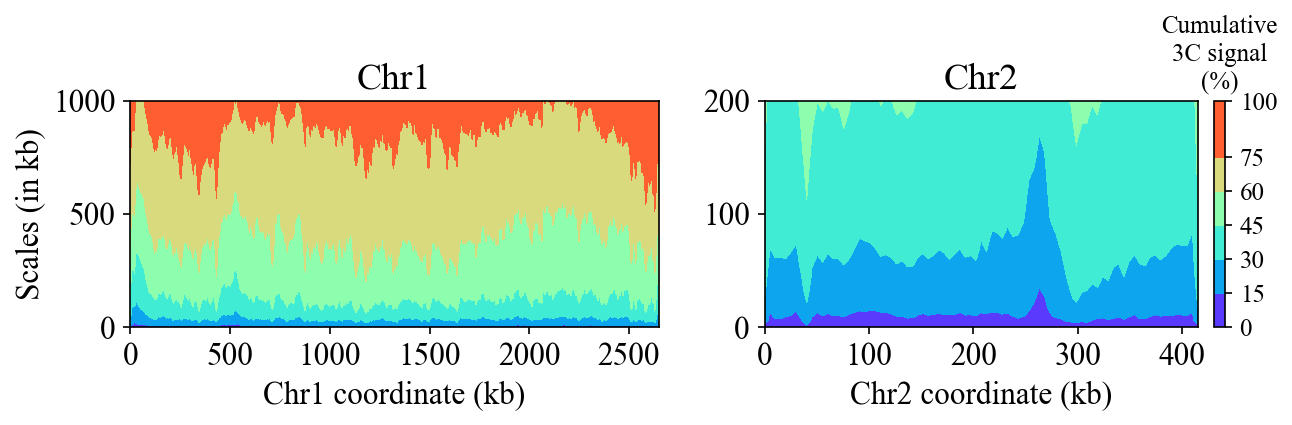

In [4]:
fig = plt.figure(figsize=(10, 2), dpi=150)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 15})

gs = gridspec.GridSpec(1, 2, figure=fig)
ax0 = plt.subplot(gs[0])
ax0.contourf(comp_scale1,vmin=0.0,vmax=1.0,levels=[0,0.15,0.3,0.45,0.6,0.75,1],extent=[0,comp_scale1.shape[1],0,1000],cmap="rainbow")
ax0.set_xlabel("Chr1 coordinate (kb)")
ax0.set_ylabel("Scales (in kb)")
ax0.set_title("Chr1")
tick_locs = range(0,comp_scale1.shape[1],100)
tick_lbls = (array( range(0,comp_scale1.shape[1],100)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)

ax1 = plt.subplot(gs[1])
ax1.contourf(comp_scale2,vmin=0.0,vmax=1.0,levels=[0,0.15,0.3,0.45,0.6,0.75,1],extent=[0,comp_scale2.shape[1],0,200],cmap="rainbow")
ax1.set_xlabel("Chr2 coordinate (kb)")
ax1.set_title("Chr2")
im = ax1.contourf(comp_scale2,vmin=0.0,vmax=1.0,levels=[0,0.15,0.3,0.45,0.6,0.75,1],extent=[0,comp_scale2.shape[1],0,200],cmap="rainbow")
cb1 = colorbar(im, pad=0.03, spacing='proportional')
cb1.set_ticks([0,0.15,0.3,0.45,0.6,0.75,1])
cb1.set_ticklabels(['0','15','30','45','60','75','100'])
cb1.ax.tick_params(labelsize=12)
cb1.ax.set_title('Cumulative\n3C signal\n(%)',fontsize=12)
tick_locs = range(0,comp_scale2.shape[1],20)
tick_lbls = (array( range(0,comp_scale2.shape[1],20)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)

plt.savefig("../pictures/wt_scalogram.jpg", bbox_inches='tight', dpi=300)

In [5]:
import directional_indice
chr1 = matscn1[:530,:530]
chr2 = matscn1[530:613,530:613]
scales = 20
DI20_chr1 = directional_indice.directional(chr1,scales)
DI20_chr2 = directional_indice.directional(chr2,scales)

Size of the matrix entetered for the directional index:
530
Size of the matrix entetered for the directional index:
83


In [6]:
for i in range(len(DI20_chr1)):
    if DI20_chr1[i] > 2:
        DI20_chr1[i] = 2

for i in range(len(DI20_chr2)):
    if DI20_chr2[i] > 2:
        DI20_chr2[i] = 2

In [7]:
def CID_identify(borders, thr, bin_num):
    CID = []
    for i in borders:
        if i >= thr:
            CID.append(thr)
        if i <= -thr:
            CID.append(-thr)
        if i < thr and i > -thr:
            CID.append(i)

    CID_Boundary_count = 0
    CID_Boundary = []
    for i in range(bin_num):
        try:
            d = CID.index(thr,i)
            if CID[i] == -thr and CID[i+1:d].count(-thr) == 0:
                CID_Boundary_count = CID_Boundary_count + 1
                CID_Boundary.append([i,d])
        except ValueError:
            pass
    return CID_Boundary_count, CID_Boundary

CID_Boundary_count1, CID_Boundary1 = CID_identify(DI20_chr1[:,0], 2, 530)
print(CID_Boundary_count1)
print(CID_Boundary1)
CID_Boundary_count2, CID_Boundary2 = CID_identify(DI20_chr2[:,0], 2, 83)
print(CID_Boundary_count2)
print(CID_Boundary2)

21
[[3, 5], [49, 50], [64, 68], [86, 88], [109, 118], [138, 143], [174, 176], [198, 199], [206, 216], [227, 241], [251, 254], [263, 271], [285, 288], [296, 302], [352, 360], [368, 401], [410, 414], [438, 442], [456, 457], [491, 494], [516, 517]]
2
[[0, 1], [52, 53]]


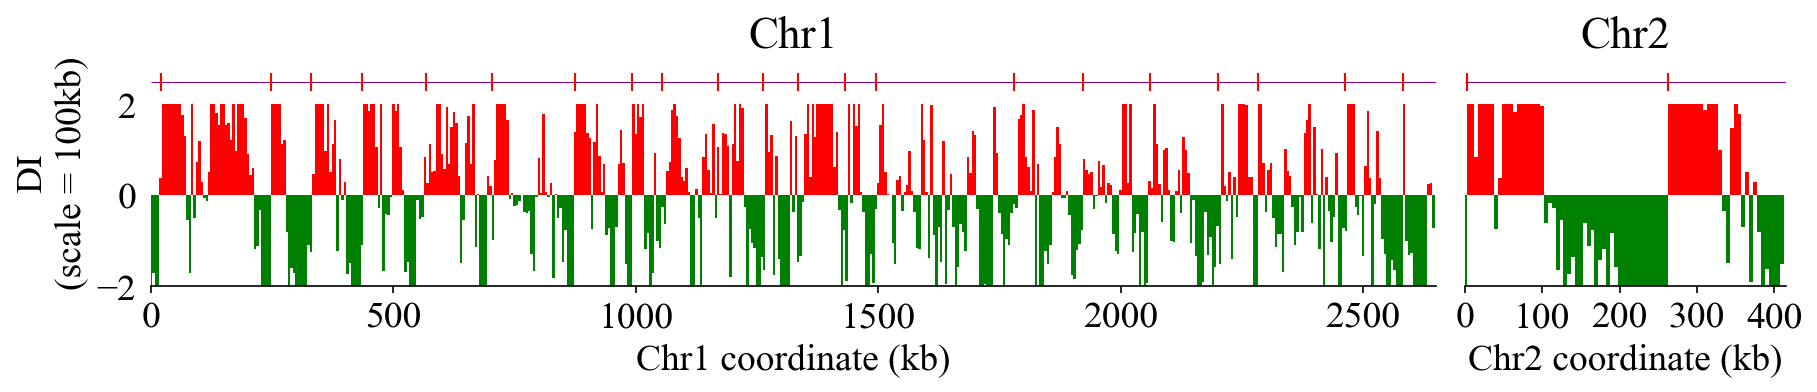

In [8]:
fig = plt.figure(figsize=(12, 2.5), dpi=150, constrained_layout=True)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 18})

gs = gridspec.GridSpec(1, 5, figure=fig)
ax0 = plt.subplot(gs[:,0:4])
borders1 = list(range(len(DI20_chr1)))
borders2 = array(DI20_chr1[:,0])
ax0.set_xlim([0, len(DI20_chr1.T)])
ax0.set_xticks([0,chr1.shape[0]])
ax0.set_ylim([-2.0, 3.0])
colormap=np.where(borders2>0, "r", "g")
ax0.bar(x=borders1, height=borders2, color=colormap, width=1)
ax0.set_ylabel("DI\n(scale = 100kb)")
tick_locs = range(0,chr1.shape[0],100)
tick_lbls = (array( range(0,chr1.shape[0],100)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax0.set_xlabel("Chr1 coordinate (kb)")
ax0.set_title("Chr1")
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.tick_params(left=False)
ax0.hlines(2.5, 0, 530, color ="purple", lw=0.5)
for i in CID_Boundary1:
    ax0.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)

ax1 = plt.subplot(gs[:,4:6], sharey = ax0)
borders3 = list(range(len(DI20_chr2)))
borders4 = array(DI20_chr2[:,0])
ax1.set_xlim([0, len(DI20_chr2.T)])
ax1.set_xticks([0,chr2.shape[0]])
ax1.set_ylim([-2.0, 3.0])
colormap1=np.where(borders4>0, "r", "g")
ax1.bar(x=borders3, height=borders4, color=colormap1, width=1)
ax1.yaxis.set_visible(False)
tick_locs = range(0,chr2.shape[0],20)
tick_lbls = (array( range(0,chr2.shape[0],20)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax1.set_xlabel("Chr2 coordinate (kb)")
ax1.set_title("Chr2")
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.hlines(2.5, 0, 83, color ="purple", lw=0.5)
for i in CID_Boundary2:
    ax1.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)

plt.savefig("../pictures/wt_DI.jpg", bbox_inches='tight', dpi=300)